In [ ]:
! apt-get -y update
! apt-get -y install unzip wget git

In [1]:
! wget https://www.dropbox.com/s/zzrsxojedhc0wff/dataset.zip?dl=1

--2020-09-06 18:20:11--  https://www.dropbox.com/s/zzrsxojedhc0wff/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.1, 2620:100:6028:1::a27d:4701
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zzrsxojedhc0wff/dataset.zip [following]
--2020-09-06 18:20:12--  https://www.dropbox.com/s/dl/zzrsxojedhc0wff/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36bbc7c5b3c389ae0ce00c2ea0.dl.dropboxusercontent.com/cd/0/get/A-4kjjc8nMmTlv9tOPks-3idCI9RcjUMnY7gtm8xM_L0MGgPdF1uyfiECNgIMLCA5wxvKwLXwvMXM8BemwEhbaWqrZKpWhzeG0xRmR-SPl6xUllvsvDtaLecffaZ0lTKbl0/file?dl=1# [following]
--2020-09-06 18:20:12--  https://uc36bbc7c5b3c389ae0ce00c2ea0.dl.dropboxusercontent.com/cd/0/get/A-4kjjc8nMmTlv9tOPks-3idCI9RcjUMnY7gtm8xM_L0MGgPdF1uyfiECNgIMLCA5wxvKwLXwvMXM8BemwEhbaWqrZKpWhzeG0xRmR-SPl6xUllv

In [12]:
! unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/348.png         
  inflating: dataset/1804.png        
  inflating: dataset/1810.png        
  inflating: dataset/1186.png        
  inflating: dataset/412.png         
  inflating: dataset/374.png         
  inflating: dataset/1838.png        
  inflating: dataset/360.png         
  inflating: dataset/406.png         
  inflating: dataset/1192.png        
  inflating: dataset/1179.png        
  inflating: dataset/2470.png        
  inflating: dataset/2316.png        
  inflating: dataset/2302.png        
  inflating: dataset/2464.png        
  inflating: dataset/1145.png        
  inflating: dataset/1623.png        
  inflating: dataset/1637.png        
  inflating: dataset/1151.png        
  inflating: dataset/2458.png        
  inflating: dataset/638.png         
  inflating: dataset/176.png         
  inflating: dataset/88.png          
  inflating: dataset/610.png         
  inflating: dataset/1384.png        
  infl

In [13]:
! ls -alh dataset | wc -l

2632


In [2]:
! pip install git+git://github.com/ternaus/TernausNet.git#egg=ternausnet

  Cloning git://github.com/ternaus/TernausNet.git to /tmp/pip-install-ofnbzour/ternausnet
  Running command git clone -q git://github.com/ternaus/TernausNet.git /tmp/pip-install-ofnbzour/ternausnet
  Created wheel for ternausnet: filename=ternausnet-0.0.1-py3-none-any.whl size=4848 sha256=483ff256b0573c5b9a4c4c30bc1e91e7ea4f56c701a7abbc0159719dfff1a0ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-zl2qhd99/wheels/24/64/9b/ea42855f0b2a69e2109d188671b4e60055235e66afaa8c0bbf
Successfully built ternausnet


In [1]:
import ternausnet.models

In [2]:
model = ternausnet.models.UNet11(pretrained=True)

In [9]:
help(ternausnet.models.UNet11)

Help on class UNet11 in module ternausnet.models:

class UNet11(torch.nn.modules.module.Module)
 |  UNet11(num_filters: int = 32, pretrained: bool = False) -> None
 |  
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  Method resoluti

In [30]:
! pip install Pillow

In [4]:
from torch.utils.data import Dataset, DataLoader

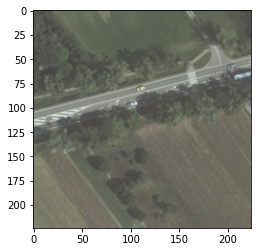

In [87]:
I = np.asarray(Image.open('dataset/20.png'))
plt.imshow(I[:, :, :3])

In [93]:
0.0039 * 255

0.9944999999999999

In [5]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms


class WaterDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        super().__init__()
        self.image_folder = image_folder
        self.transforms = transform
        self.to_tensor = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406, 0],
                                std=[0.229, 0.224, 0.225, 1])
        ])
        
    def __len__(self):
        # return 16
        return len([name for name in os.listdir(self.image_folder) if name.endswith('.png') ])
    
    
    def __getitem__(self, idx):
        idx = idx + 1
        I = Image.open(f'{self.image_folder}/{idx}.png') # h x w x 4
        if self.transforms is not None:
            I = self.transforms(I) # h x w x 4
        I = self.to_tensor(I)
        im = I[:3, :, :]
        gt = I[[-1], :, :] * 255
        return im, gt

In [6]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    # transforms.RandomRotation(90, resample=False, expand=False, center=None, fill=None),
])

d = WaterDataset('dataset', transform)

In [7]:
len(d)

2628

In [107]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [108]:
d[20][1].max()

tensor(1.)

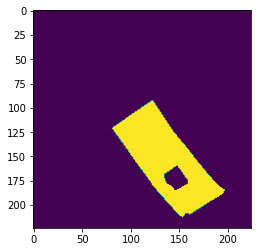

In [110]:
plt.imshow(d[20][1][0].numpy())

In [78]:
! pip install matplotlib

     |████████████████████████████████| 11.6 MB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 16.5 MB/s eta 0:00:01


In [8]:
import torch
def viz(model, i, device):
    I = np.asarray(Image.open(f'dataset/{i}.png'))
    II = I[:, :, :3].copy()
    I = torch.tensor(I, dtype=torch.float)
    I = I / 255
    I = I.transpose(1, 2).transpose(0, 1)
    im = I[:3, :, :]
    
    im = (im - torch.tensor([0.485, 0.456, 0.406])[..., None, None]) / torch.tensor([0.229, 0.224, 0.225])[..., None, None]
    
    gt = (I[3, :, :] * 255).numpy()
    im = im[None, ...]
    im = im.to(device)
    
    pred = model(im).detach().cpu().numpy()[0, 0]
    mask_pred = (pred > 0.5)
    
    gt = gt > 0.5
    
    print(mask_pred.sum())
    print(II.shape, mask_pred.shape)
    II[:, :, 0][mask_pred] = 255
    II[:, :, 1][gt] = 255
    return II
    

4535
(224, 224, 3) (224, 224)


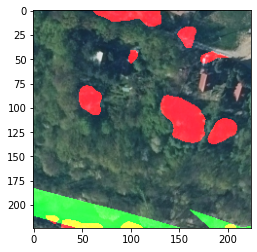

In [152]:
res = viz(model, 100, 'cuda:0')
plt.imshow(res)

In [10]:
! pip install tqdm

In [14]:
from torch.optim import Adam
import torch.nn as nn

from tqdm import tqdm

loss = nn.BCEWithLogitsLoss()

optimizer = Adam(model.parameters())

dl = DataLoader(d, batch_size=32, shuffle=True, num_workers=7)

num_epochs = 100

device = 'cuda:0'

model = model.to(device)

for epoch in range(num_epochs):
    for im, gt in tqdm(dl):
        im = im.to(device)
        gt = gt.to(device)
        optimizer.zero_grad()
        
        pred = model(im)
        L = loss(pred, gt)
        # print(L.item(), (pred > 0.5).sum())
        L.backward()
        optimizer.step()


 55%|█████▌    | 46/83 [00:19<00:15,  2.33it/s]


KeyboardInterrupt: 

In [101]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(builtins.object)
 |  DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, multiprocessing_context=None, generator=None)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have 